In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
# from konlpy.tag import Okt
df = pd.read_excel("2011_2020 대구 인구 + 일자리.xlsx")

C:\Users\user\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [2]:
stop_words=['인구','통합','집중','기관','유치','정부','산업','의원','주민','기업','규모','부족','진행',
            '비율','기준','평균','수준','도시','사회','증가','감소','생각','가구','사람','여성','전망','운영','국민','추진','결과','조사','정도','계획','발전','대비','시작','통계청','비중','확대',
            '한국','지역','우리나라','전국','지방','국가','지자체','대구','서울','부산','경북','울산','전남','경기','광주','한국','코로나','국회의원','경쟁력','그동안','일본','중국','미국',
            '65세','통계청','관계자','만큼','1만','2만','3만','1천','2천','3천','10만','코로나19','5만','위원회','지자체','새누리당','정의당','광역시','국회','수도','상황',
            '한국당','더불어민주당','문재인','부여','홈페이지','리얼미터','민주당','1위','지역구','선거구','지지층','지지율','공무원','위원장','안철수','사람들','가능성','감염','행정통합','확진자','법안',
            '울산','대구','부산','전남','대구시','경북','광주','전북','경남','충남','강원','경북도','제주','충북','달성군','달서구','대구경북','대한민국','한국','우리나라','공항','앵커',
            '충청','호남','영남','대구경북','구미','서울','수도권','인천','세종시','포항','청주','충주','세종','춘천','수원','전주','창원','중구','동구','남구','수성구','대전']
years=[]
for year in range(2011,2021):
    years.append(year)
    df_1 = df[df["일자"]//10000 == year]
    tmp = df_1["키워드"].apply(lambda x: str(x).split(','))
    cont = []
    for i in range(len(tmp)):
        cont.append([word for word in tmp.iloc[i] if word not in stop_words])
    tmp2 = pd.Series(cont)
    df_words = [word for words in tmp for word in words if word not in stop_words]
    df_keyword=pd.DataFrame(Counter(df_words).most_common())
    a=df_keyword[1]
    a.index=df_keyword[0]
    globals()['키워드{}'.format(year)]= pd.DataFrame(a)
key_2020 = 키워드2020.head(100).index  
키워드2012.loc["소멸"]=0
키워드2012.loc["뉴딜"]=0
키워드2013.loc["뉴딜"]=0
키워드2015.loc["뉴딜"]=0
키워드2016.loc["뉴딜"]=0

all =pd.DataFrame()
for year in range(2011,2021):
    all=  pd.concat([all,globals()['키워드{}'.format(year)].loc[key_2020,:]],axis=1)
all.columns=years
    
all.to_csv(f"일자리_Top100.csv", encoding= "utf-8-sig")

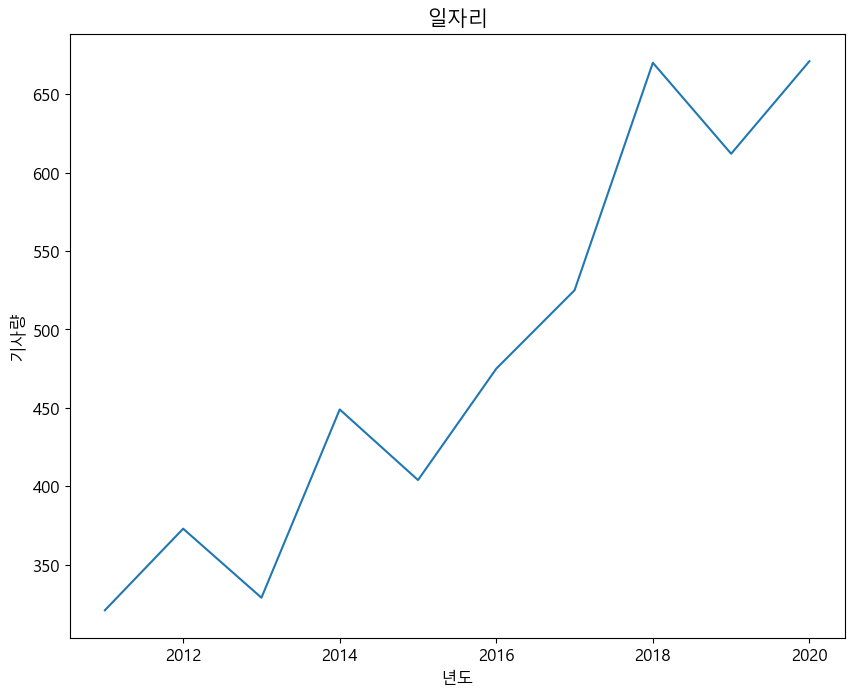

In [3]:
sum=[]
for year in range(2011,2021):
    df_1 = df[df["일자"]//10000 == year]
    a= len(df_1)
    sum.append(a)
sum=pd.DataFrame(sum)
sum.index=years
plt.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='Malgun Gothic',size= 12) 
plt.figure(figsize=(10,8),dpi=100)
plt.title("일자리",size =15)
plt.ylabel("기사량")
plt.xlabel("년도")
plt.plot(sum)